# Homework 1
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2021-04-19 01:53:30--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2021-04-19 01:53:30 (75.5 MB/s) - ‘wines.csv’ saved [10957/10957]



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
random.seed(30)

In [3]:
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Check if we have NaN. No it's clean
df.isnull().values.any()

False

In [5]:
X = df.drop(['Class'], axis=1).values
X.shape

(178, 13)

In [6]:
y = df['Class'].values
y.shape

(178,)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
inputs = keras.Input(shape=(13,))
x = inputs

In [11]:
x

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_1')>

In [12]:
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

outputs = layers.Dense(4, activation='softmax')(x)

In [13]:
model = keras.Model(inputs=inputs, outputs=outputs, name='wine_model')

In [14]:
model.summary()

Model: "wine_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 9,476
Trainable params: 9,476
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
h = model.fit(x_train, y_train, epochs=250, batch_size=64, validation_split=0.2)

Epoch 1/250
2/2 [==============================] - 1s 449ms/step - loss: 32.3051 - accuracy: 0.2396 - val_loss: 3.8573 - val_accuracy: 0.3125
Epoch 2/250
2/2 [==============================] - 0s 30ms/step - loss: 3.5433 - accuracy: 0.4531 - val_loss: 12.3035 - val_accuracy: 0.4375
Epoch 3/250
2/2 [==============================] - 0s 30ms/step - loss: 8.7970 - accuracy: 0.4583 - val_loss: 13.6848 - val_accuracy: 0.3750
Epoch 4/250
2/2 [==============================] - 0s 30ms/step - loss: 9.3882 - accuracy: 0.5000 - val_loss: 15.5868 - val_accuracy: 0.1875
Epoch 5/250
2/2 [==============================] - 0s 31ms/step - loss: 9.6432 - accuracy: 0.4635 - val_loss: 11.7138 - val_accuracy: 0.5000
Epoch 6/250
2/2 [==============================] - 0s 33ms/step - loss: 7.4324 - accuracy: 0.6406 - val_loss: 10.4206 - val_accuracy: 0.5000
Epoch 7/250
2/2 [==============================] - 0s 34ms/step - loss: 6.9630 - accuracy: 0.5260 - val_loss: 5.2292 - val_accuracy: 0.4375
Epoch 8/250
2

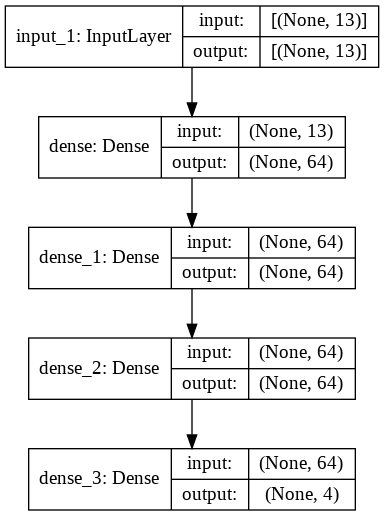

In [17]:
keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [18]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

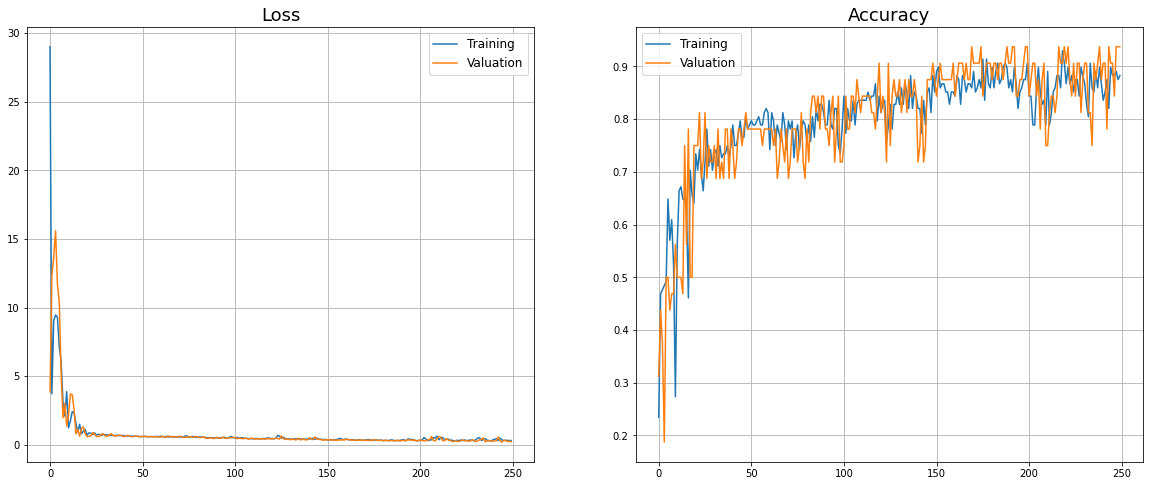

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(h.history['loss'], label='Training')
axs[0].plot(h.history['val_loss'], label='Valuation')
axs[0].set_title('Loss', fontsize=18)
axs[0].grid(True)
axs[0].legend(fontsize=12)

axs[1].plot(h.history['accuracy'], label='Training')
axs[1].plot(h.history['val_accuracy'], label='Valuation')
axs[1].set_title('Accuracy', fontsize=18)
axs[1].grid(True)
axs[1].legend(fontsize=12)

In [20]:
df1 = pd.DataFrame(data=h.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,28.998470,0.234375,3.857334,0.31250
1,3.714554,0.468750,12.303544,0.43750
2,9.044658,0.476562,13.684837,0.37500
3,9.460806,0.484375,15.586799,0.18750
4,9.308563,0.492188,11.713808,0.50000
...,...,...,...,...
245,0.316195,0.882812,0.322729,0.90625
246,0.340734,0.882812,0.323881,0.84375
247,0.312851,0.890625,0.228739,0.93750
248,0.312718,0.875000,0.275489,0.93750
